In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:

df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['class', 'sms']

In [10]:

df['class'] = df['class'].map({'ham': 0, 'spam': 1})

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['sms'])
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = naive_bayes_classifier.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.968609865470852

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[965   0]
 [ 35 115]]


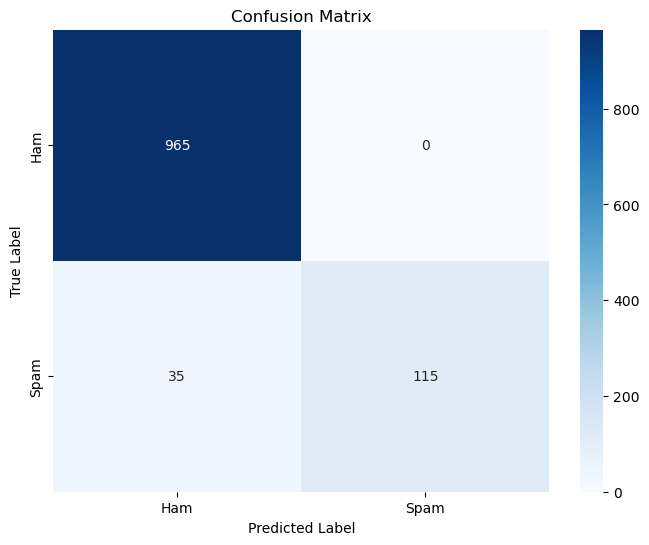

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
train_acc = naive_bayes_classifier.score(X_train, y_train)
test_acc = naive_bayes_classifier.score(X_test, y_test)


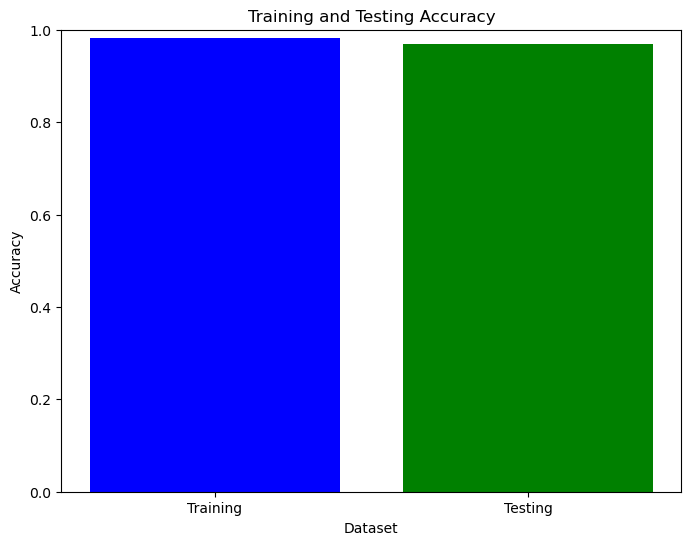

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [train_acc, test_acc], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim(0, 1)
plt.show()

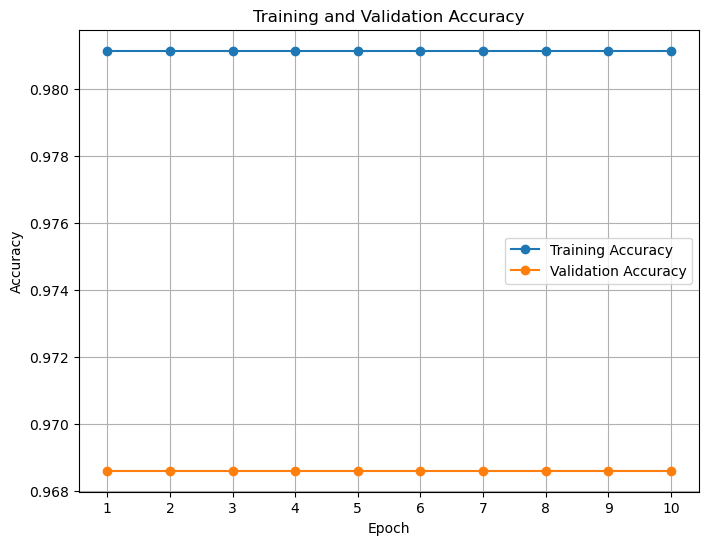

In [20]:
epochs = 10
train_acc_list = []
val_acc_list = []

for epoch in range(epochs):
    naive_bayes_classifier.fit(X_train, y_train)
    train_acc = naive_bayes_classifier.score(X_train, y_train)
    val_acc = naive_bayes_classifier.score(X_test, y_test)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

plt.figure(figsize=(8, 6))
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, train_acc_list, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc_list, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(epochs_range)
plt.show()